# Matriz de confusión

<center><div> <img src="fig/matrix.png" alt="Drawing" style="width: 600px;"/></div><center>

https://rapidminer.com/glossary/confusion-matrix/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

import seaborn as sns 
import pandas as pd

from sklearn.datasets import make_classification # Generate a random n-class classification problem.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn import metrics

# Generamos un dataset de dos clases
x, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=2)
# Entrenamos nuestro modelo de reg log
lr = LogisticRegression()
lr.fit(x_train,y_train)



LogisticRegression()

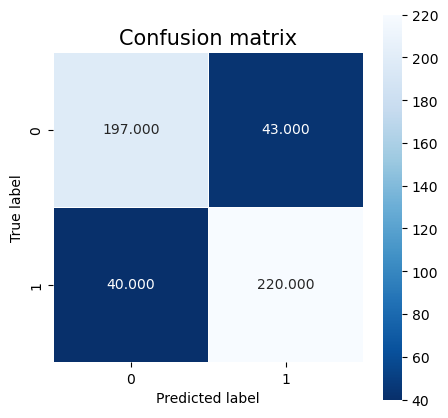

In [2]:
y_pred = lr.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('True label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix', size = 15);


* La clase final se determinará utilizando esta probabilidad y un umbral de decisión, este umbral puede ser ajustado para modificar el comportamiento de nuestro modelo para un problema específico.

* Los dos tipos errores de predicción son:

1. **Falso Positivo**: Predecir un evento cuando no hubo evento
2. **Falso Negativo**: Predecir que no hubo un evento cuando sí que hubo evento

El balanceo entre estos dos errores es lo que nos otorgará el nivel de umbral óptimo.

# Curva ROC Receiver Operating Characteristic (Característica Operativa del Receptor).

Para interpretar correctamente las predicciones realizadas por modelos de clasificación binarios utilizaremos las curvas ROC y las curvas de precisión-sensibilidad (Precision-Recall).

La **curva ROC** es una gráfica de la razón de falsos positivos (eje x) y de la razón de verdaderos positivos (eje y) dado un umbral, es decir, nos da la "falsa alarma" vs la tasa de éxito.

La tasa de verdaderos positivos se calcula como el número de positivos verdaderos divididos entre el número de positivos verdaderos y de falsos negativos, es decir, la **sensibilidad** de nuestro modelo para prediciendo las clases positivas cuando la salida real es positiva. 

La tasa de falsos positivos se calcula como el número de falsos positivos dividido entre la suma de falsos positivos con los verdaderos negativos. Se considera como la tasa de "falsa alarma", es decir, que una clase negativa sea determinada por el modelo como positiva.

La **especificidad** es la inversa de la tasa de falsos positivos. Se obtiene dividiendo el número total de verdaderos negativos entre la suma de los verdaderos negativos y los falsos positivos. 

La curva ROC permite comparar diferentes modelos para identificar cual otorga mejor rendimiento como clasificador y el área debajo de la curva (AUC) es el resumen de la calidad del modelo.

* Valores pequeños en el eje X indican pocos falsos positivos y muchos verdaderos negativos
* Valores grandes en el eje Y indican elevados verdaderos positivos y pocos falsos negativos

1. El modelo morado representa a un clasificador perfecto. 
2. Las curvas más alejadas son los peores modelos. 
3. Un modelo aleatorio sin entrenar es una línea horizontal a media altura (0.5).

<center><div> <img src="fig/rocv2.png" alt="Drawing" style="width: 500px;"/></div><center>

https://glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc/


# Curva de precisión-sensibilidad (Precision-Recall)

La **precisión** se calcula como el número de verdaderos positivos entre la suma de verdaderos positivos y de falsos positivos. Describe cómo de bueno es el modelo a la hora de predecir las salidas de la clase positiva. 

La curva de precisión-sensibilidad enfrenta la precisión (eje y) con la sensibilidad (eje x) para diferentes umbrales.

https://arxiv.org/pdf/1905.05441.pdf

La curva de precisión-sensibilidad es útil cuando tenemos clases desbalanceadas, donde suele ser bastante común que haya muchos registros negativos (clase 0) y muy pocos positivos (clase 1), ya que no tiene en cuenta los falsos negativos. La curva de precisión-sensibilidad solo se preocupa de la clase positiva, es decir, de la clase minoritaria.

<center><div> <img src="fig/PR.png" alt="Drawing" style="width: 400px;"/></div><center>



El rendimiento del modelo se puede evaluar con dos valores:

**ROC**-> Área bajo la curva (AUC)
**PR** -> Valor F (F-Score) Calcula la media armónica de la precisión y la sensibilidad. 

\begin{align}
F_1 = 2* \frac{P*R}{P+R}
\end{align}

Sin entrenar: ROC AUC=0.500
Regresión Logística: auc=0.898 f1=0.841 


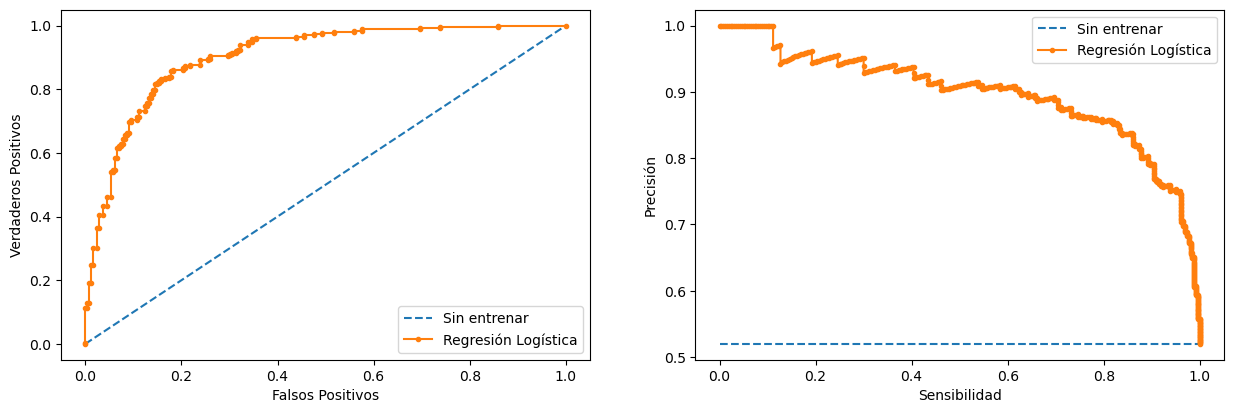

In [3]:
#Curva ROC y AUC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Generamos un clasificador sin entrenar ,  0 a todo
ns_probs = [0 for _ in range(len(y_test))]
# Predecimos las probabilidades entrenando con lr
lr_probs = lr.predict_proba(x_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
#print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)


# PR y F1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
print('Regresión Logística: auc=%.3f f1=%.3f ' % (lr_auc, lr_f1))
no_train = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.legend()

plt.subplot(2,2,2)
plt.plot([0, 1], [no_train, no_train], linestyle='--', label='Sin entrenar')
plt.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
#Etiquetas de ejes
plt.xlabel('Sensibilidad')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Clases desbalanceadas

Sin entrenar: ROC AUC=0.500
Regresión Logística: auc=0.054 f1=0.000 


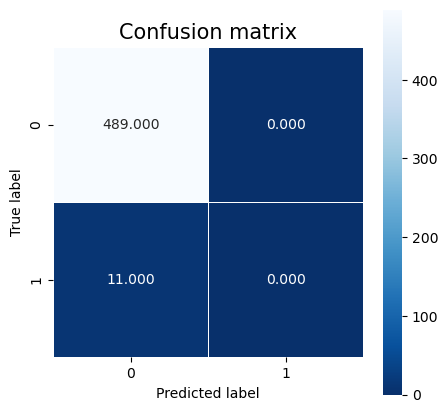

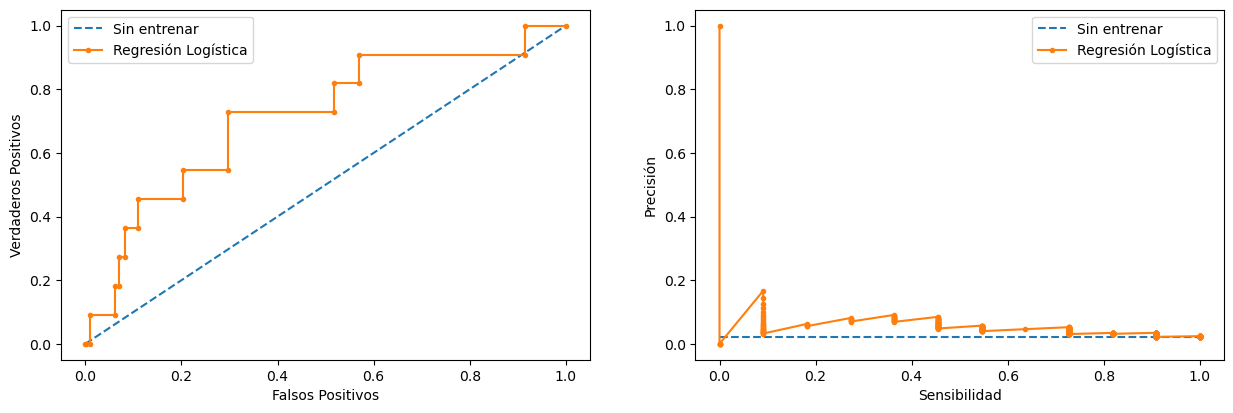

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

import seaborn as sns 
import pandas as pd

from sklearn.datasets import make_classification # Generate a random n-class classification problem.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn import metrics

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

###### Generamos un dataset de dos clases desbalanceadas
x, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
######

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=2)
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('True label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix', size = 15);

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
print('Regresión Logística: auc=%.3f f1=%.3f ' % (lr_auc, lr_f1))
no_train = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(15,10))



plt.subplot(2,2,1)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.legend()

plt.subplot(2,2,2)
plt.plot([0, 1], [no_train, no_train], linestyle='--', label='Sin entrenar')
plt.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
#Etiquetas de ejes
plt.xlabel('Sensibilidad')
plt.ylabel('Precisión')
plt.legend()
plt.show()